一、统计数据集大小

In [16]:
import os
import cv2 as cv
import glob as gb
import numpy as np1
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from concurrent.futures import ThreadPoolExecutor

In [ ]:
# C:/Users/13651/Desktop/train
train_dir= r'C:\Users\13651\Desktop\train'
val_dir= r'C:\Users\13651\Desktop\val'
test_dir= r'C:\Users\13651\Desktop\test'

Raccoon sample size :  103 

Horse sample size :  400 

Goat sample size :  202 

Mule sample size :  61 

Duck sample size :  542 

Owl sample size :  406 

Bear sample size :  87 

Chicken sample size :  388 

Fox sample size :  148 

Pig sample size :  190 

Sheep sample size :  99 

Cattle sample size :  70 

training data size : 2696


<BarContainer object of 12 artists>

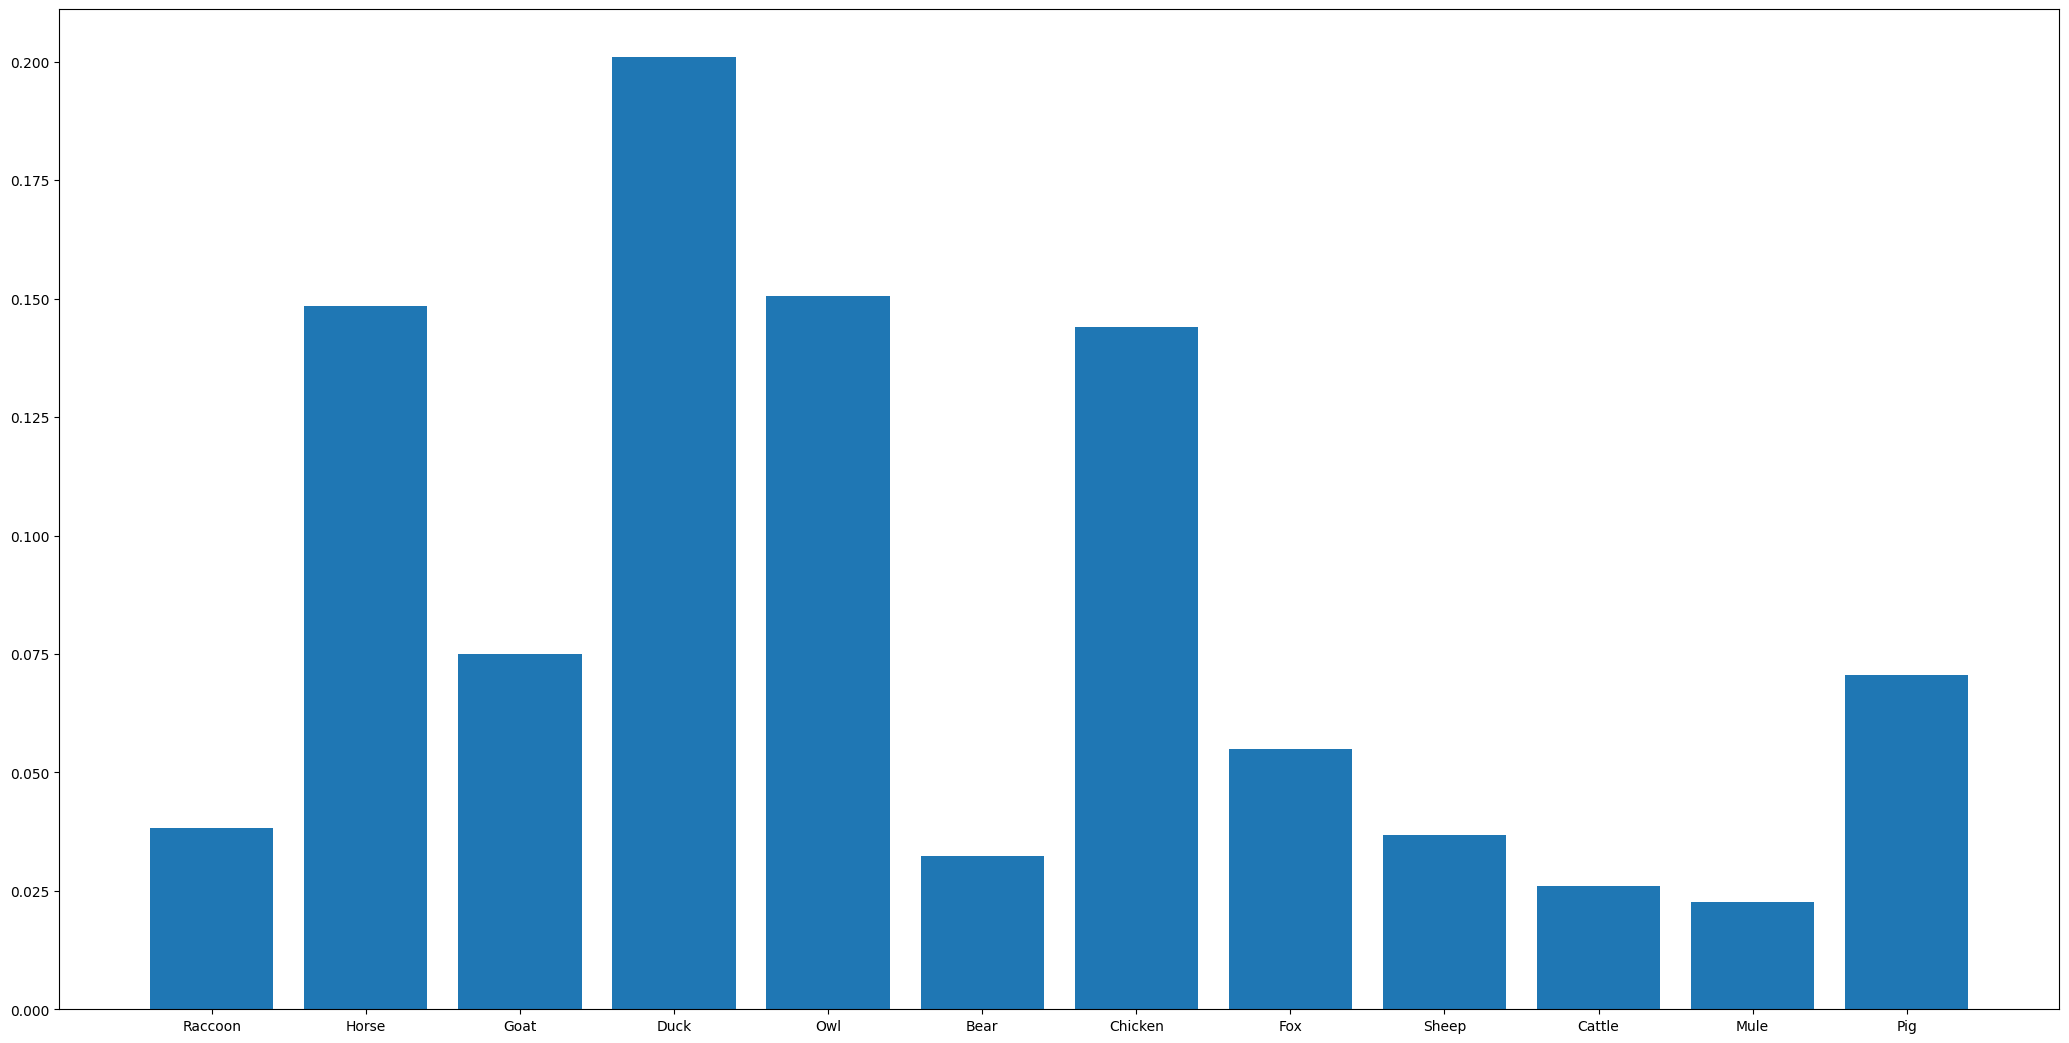

In [5]:
training_images_files_names_raccoon = len(os.listdir("C:/Users/13651/Desktop/train/Raccoon"))-1
training_images_files_names_horses = len(os.listdir("C:/Users/13651/Desktop/train/Horse"))-1
training_images_files_names_goat = len(os.listdir("C:/Users/13651/Desktop/train/Goat"))-1
training_images_files_names_mule = len(os.listdir("C:/Users/13651/Desktop/train/Mule"))-1
training_images_files_names_duck = len(os.listdir("C:/Users/13651/Desktop/train/Duck"))-1
training_images_files_names_owl = len(os.listdir("C:/Users/13651/Desktop/train/Owl"))-1
training_images_files_names_bear = len(os.listdir("C:/Users/13651/Desktop/train/Bear"))-1
training_images_files_names_chicken = len(os.listdir("C:/Users/13651/Desktop/train/Chicken"))-1
training_images_files_names_fox = len(os.listdir("C:/Users/13651/Desktop/train/Fox"))-1
training_images_files_names_pig = len(os.listdir("C:/Users/13651/Desktop/train/Pig"))-1
training_images_files_names_sheep = len(os.listdir("C:/Users/13651/Desktop/train/Sheep"))-1
training_images_files_names_cattle = len(os.listdir("C:/Users/13651/Desktop/train/Cattle"))-1
print("Raccoon sample size : ",training_images_files_names_raccoon,"\n")
print("Horse sample size : ",training_images_files_names_horses,"\n")
print("Goat sample size : ",training_images_files_names_goat,"\n")
print("Mule sample size : ",training_images_files_names_mule,"\n")
print("Duck sample size : ",training_images_files_names_duck,"\n")
print("Owl sample size : ",training_images_files_names_owl,"\n")
print("Bear sample size : ",training_images_files_names_bear,"\n")
print("Chicken sample size : ",training_images_files_names_chicken,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Pig sample size : ",training_images_files_names_pig,"\n")
print("Sheep sample size : ",training_images_files_names_sheep,"\n")
print("Cattle sample size : ",training_images_files_names_cattle,"\n")
training_data_size = training_images_files_names_raccoon+training_images_files_names_horses+training_images_files_names_goat+training_images_files_names_mule+training_images_files_names_duck+training_images_files_names_owl+training_images_files_names_bear+training_images_files_names_chicken+training_images_files_names_fox+training_images_files_names_pig+training_images_files_names_sheep+training_images_files_names_cattle
occurences = [training_images_files_names_raccoon/training_data_size ,training_images_files_names_horses/training_data_size ,training_images_files_names_goat/training_data_size ,training_images_files_names_duck/training_data_size ,training_images_files_names_owl/training_data_size ,training_images_files_names_bear/training_data_size ,training_images_files_names_chicken/training_data_size,training_images_files_names_fox/training_data_size,training_images_files_names_sheep/training_data_size,training_images_files_names_cattle/training_data_size,training_images_files_names_mule/training_data_size,training_images_files_names_pig/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Raccoon","Horse","Goat","Duck","Owl","Bear","Chicken","Fox","Sheep","Cattle","Mule","Pig"],occurences)

Raccoon sample size :  25 

Horse sample size :  71 

Goat sample size :  47 

Mule sample size :  18 

Duck sample size :  44 

Owl sample size :  35 

Bear sample size :  19 

Chicken sample size :  68 

Fox sample size :  34 

Pig sample size :  48 

Sheep sample size :  37 

Cattle sample size :  85 

validation data size: 531


<BarContainer object of 12 artists>

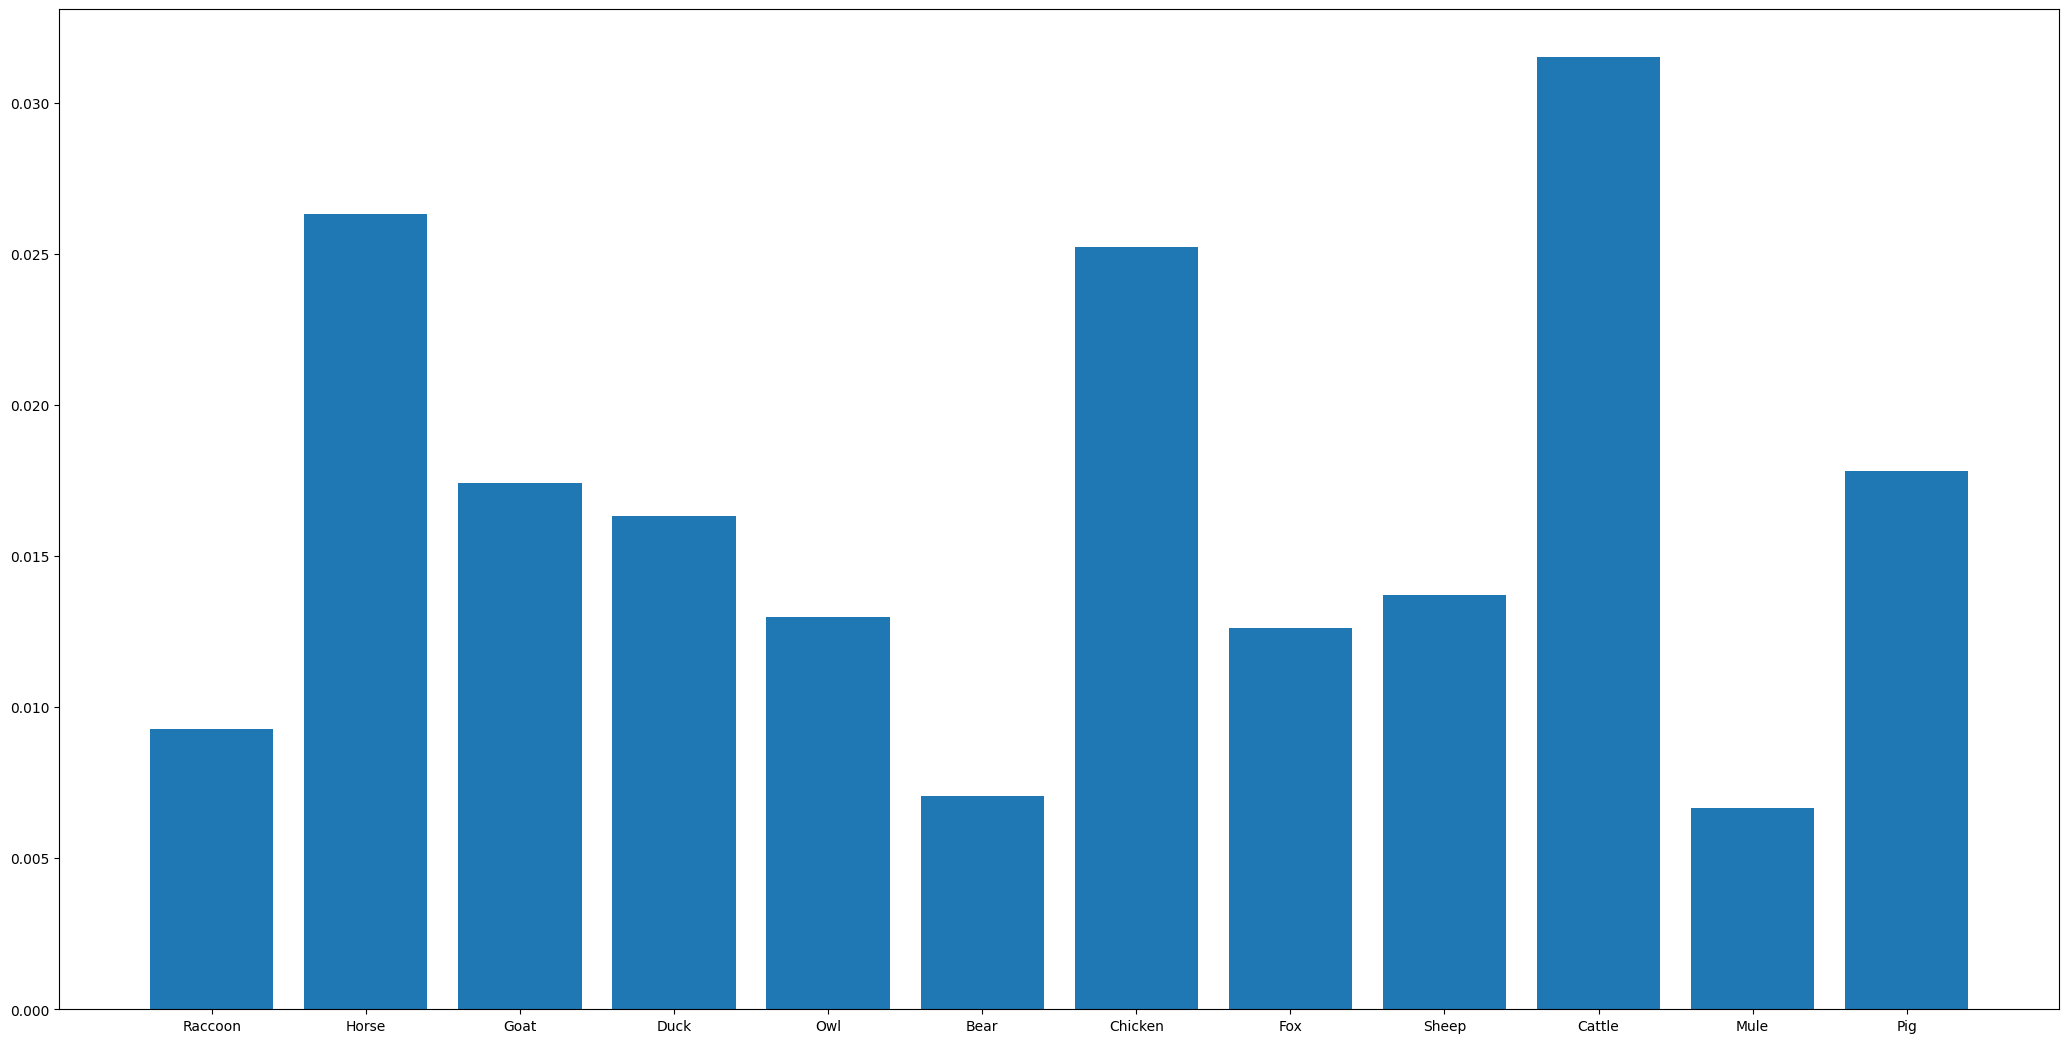

In [6]:
training_images_files_names_raccoon = len(os.listdir("C:/Users/13651/Desktop/val/Raccoon"))-1
training_images_files_names_horses = len(os.listdir("C:/Users/13651/Desktop/val/Horse"))-1
training_images_files_names_goat = len(os.listdir("C:/Users/13651/Desktop/val/Goat"))-1
training_images_files_names_mule = len(os.listdir("C:/Users/13651/Desktop/val/Mule"))-1
training_images_files_names_duck = len(os.listdir("C:/Users/13651/Desktop/val/Duck"))-1
training_images_files_names_owl = len(os.listdir("C:/Users/13651/Desktop/val/Owl"))-1
training_images_files_names_bear = len(os.listdir("C:/Users/13651/Desktop/val/Bear"))-1
training_images_files_names_chicken = len(os.listdir("C:/Users/13651/Desktop/val/Chicken"))-1
training_images_files_names_fox = len(os.listdir("C:/Users/13651/Desktop/val/Fox"))-1
training_images_files_names_pig = len(os.listdir("C:/Users/13651/Desktop/val/Pig"))-1
training_images_files_names_sheep = len(os.listdir("C:/Users/13651/Desktop/val/Sheep"))-1
training_images_files_names_cattle = len(os.listdir("C:/Users/13651/Desktop/val/Cattle"))-1
print("Raccoon sample size : ",training_images_files_names_raccoon,"\n")
print("Horse sample size : ",training_images_files_names_horses,"\n")
print("Goat sample size : ",training_images_files_names_goat,"\n")
print("Mule sample size : ",training_images_files_names_mule,"\n")
print("Duck sample size : ",training_images_files_names_duck,"\n")
print("Owl sample size : ",training_images_files_names_owl,"\n")
print("Bear sample size : ",training_images_files_names_bear,"\n")
print("Chicken sample size : ",training_images_files_names_chicken,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Pig sample size : ",training_images_files_names_pig,"\n")
print("Sheep sample size : ",training_images_files_names_sheep,"\n")
print("Cattle sample size : ",training_images_files_names_cattle,"\n")
validation_data_size = training_images_files_names_raccoon+training_images_files_names_horses+training_images_files_names_goat+training_images_files_names_mule+training_images_files_names_duck+training_images_files_names_owl+training_images_files_names_bear+training_images_files_names_chicken+training_images_files_names_fox+training_images_files_names_pig+training_images_files_names_sheep+training_images_files_names_cattle
occurences = [training_images_files_names_raccoon/training_data_size ,training_images_files_names_horses/training_data_size ,training_images_files_names_goat/training_data_size ,training_images_files_names_duck/training_data_size ,training_images_files_names_owl/training_data_size ,training_images_files_names_bear/training_data_size ,training_images_files_names_chicken/training_data_size,training_images_files_names_fox/training_data_size,training_images_files_names_sheep/training_data_size,training_images_files_names_cattle/training_data_size,training_images_files_names_mule/training_data_size,training_images_files_names_pig/training_data_size]
print("validation data size:",validation_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Raccoon","Horse","Goat","Duck","Owl","Bear","Chicken","Fox","Sheep","Cattle","Mule","Pig"],occurences)

Raccoon sample size :  26 

Horse sample size :  72 

Goat sample size :  47 

Mule sample size :  18 

Duck sample size :  44 

Owl sample size :  35 

Bear sample size :  20 

Chicken sample size :  69 

Fox sample size :  35 

Pig sample size :  48 

Sheep sample size :  37 

Cattle sample size :  86 

validation data size: 537


<BarContainer object of 12 artists>

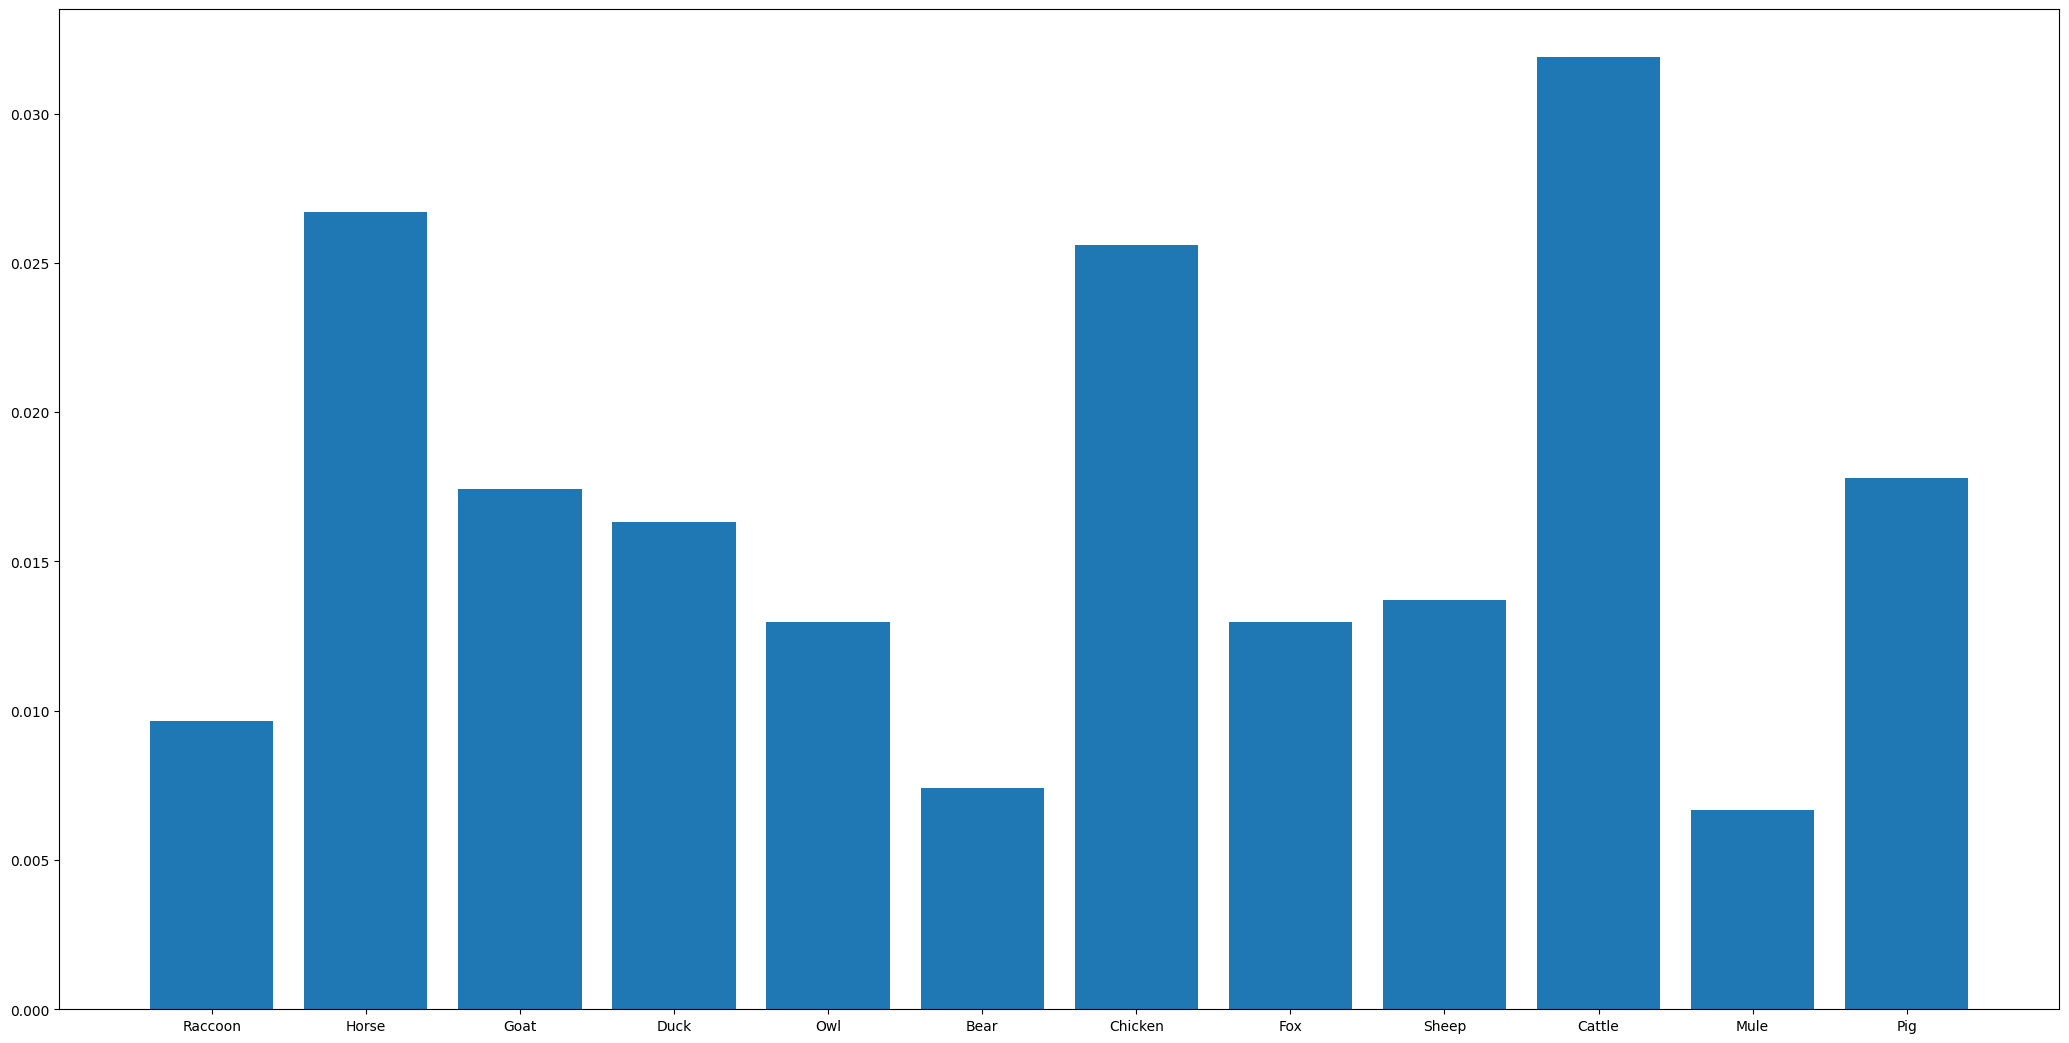

In [7]:
training_images_files_names_raccoon = len(os.listdir("C:/Users/13651/Desktop/test/Raccoon"))-1
training_images_files_names_horses = len(os.listdir("C:/Users/13651/Desktop/test/Horse"))-1
training_images_files_names_goat = len(os.listdir("C:/Users/13651/Desktop/test/Goat"))-1
training_images_files_names_mule = len(os.listdir("C:/Users/13651/Desktop/test/Mule"))-1
training_images_files_names_duck = len(os.listdir("C:/Users/13651/Desktop/test/Duck"))-1
training_images_files_names_owl = len(os.listdir("C:/Users/13651/Desktop/test/Owl"))-1
training_images_files_names_bear = len(os.listdir("C:/Users/13651/Desktop/test/Bear"))-1
training_images_files_names_chicken = len(os.listdir("C:/Users/13651/Desktop/test/Chicken"))-1
training_images_files_names_fox = len(os.listdir("C:/Users/13651/Desktop/test/Fox"))-1
training_images_files_names_pig = len(os.listdir("C:/Users/13651/Desktop/test/Pig"))-1
training_images_files_names_sheep = len(os.listdir("C:/Users/13651/Desktop/test/Sheep"))-1
training_images_files_names_cattle = len(os.listdir("C:/Users/13651/Desktop/test/Cattle"))-1
print("Raccoon sample size : ",training_images_files_names_raccoon,"\n")
print("Horse sample size : ",training_images_files_names_horses,"\n")
print("Goat sample size : ",training_images_files_names_goat,"\n")
print("Mule sample size : ",training_images_files_names_mule,"\n")
print("Duck sample size : ",training_images_files_names_duck,"\n")
print("Owl sample size : ",training_images_files_names_owl,"\n")
print("Bear sample size : ",training_images_files_names_bear,"\n")
print("Chicken sample size : ",training_images_files_names_chicken,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Pig sample size : ",training_images_files_names_pig,"\n")
print("Sheep sample size : ",training_images_files_names_sheep,"\n")
print("Cattle sample size : ",training_images_files_names_cattle,"\n")
validation_data_size = training_images_files_names_raccoon+training_images_files_names_horses+training_images_files_names_goat+training_images_files_names_mule+training_images_files_names_duck+training_images_files_names_owl+training_images_files_names_bear+training_images_files_names_chicken+training_images_files_names_fox+training_images_files_names_pig+training_images_files_names_sheep+training_images_files_names_cattle
occurences = [training_images_files_names_raccoon/training_data_size ,training_images_files_names_horses/training_data_size ,training_images_files_names_goat/training_data_size ,training_images_files_names_duck/training_data_size ,training_images_files_names_owl/training_data_size ,training_images_files_names_bear/training_data_size ,training_images_files_names_chicken/training_data_size,training_images_files_names_fox/training_data_size,training_images_files_names_sheep/training_data_size,training_images_files_names_cattle/training_data_size,training_images_files_names_mule/training_data_size,training_images_files_names_pig/training_data_size]
print("validation data size:",validation_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Raccoon","Horse","Goat","Duck","Owl","Bear","Chicken","Fox","Sheep","Cattle","Mule","Pig"],occurences)

二、将数据集提取到新文件夹中

In [8]:
animals_to_detect = ["Cattle","Pig","Horse","Sheep","Goat","Chicken","Mule","Duck","Fox","Raccoon","Bear","Owl"]

In [14]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")
os.mkdir("yolo/val")
os.mkdir("yolo/val/images")
os.mkdir("yolo/val/labels")

In [17]:
# 定义目标图片大小
size = (640, 640)

# 定义数据集类型
dataset_types = {
    'train': train_dir,
    'val': val_dir,
    'test': test_dir
}

# 创建目标路径
for dataset_type in dataset_types:
    os.makedirs(f"yolo/{dataset_type}/images", exist_ok=True)

def process_image(dataset_type, animal_specie, file_name):
    """
    处理单张图片
    """
    # 构建源路径
    src_dir = os.path.join(dataset_types[dataset_type], animal_specie)
    image_path = os.path.join(src_dir, file_name)
    
    # 检查文件是否是图片
    if not file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        print(f"跳过非图片文件: {image_path}")
        return
    
    # 读取图片
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"无法加载图片: {image_path}")
        return
    
    # 转换颜色空间 (BGR -> RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 调整图片大小
    img = cv2.resize(img, size)
    
    # 构建目标保存路径（添加类别前缀避免文件名冲突）
    save_path = os.path.join(f"yolo/{dataset_type}/images", f"{animal_specie}_{file_name}")
    
    # 保存图片
    cv2.imwrite(save_path, img)
    print(f"保存图片: {save_path}")

def process_animal_specie(dataset_type, animal_specie):
    """
    处理一个动物类别
    """
    # 构建源路径
    src_dir = os.path.join(dataset_types[dataset_type], animal_specie)
    
    # 检查路径是否存在
    if not os.path.exists(src_dir):
        print(f"路径不存在: {src_dir}")
        return
    
    # 获取文件夹中的所有文件
    image_file_names = os.listdir(src_dir)
    
    # 使用多线程处理图片
    with ThreadPoolExecutor() as executor:
        executor.map(lambda file_name: process_image(dataset_type, animal_specie, file_name), image_file_names)

# 遍历每个数据集类型
for dataset_type in dataset_types:
    print(f"处理 {dataset_type} 数据集")
    for animal_specie in animals_to_detect:
        process_animal_specie(dataset_type, animal_specie)

处理 train 数据集
保存图片: yolo/train/images\Cattle_14ab45230966dab7.jpg
保存图片: yolo/train/images\Cattle_03989f930b354f30.jpg
保存图片: yolo/train/images\Cattle_36fc147a5d45c410.jpg
保存图片: yolo/train/images\Cattle_1d40373b7cd386c9.jpg
保存图片: yolo/train/images\Cattle_2ea9326df738addf.jpg
保存图片: yolo/train/images\Cattle_16adcc6c8a9b6c86.jpg
保存图片: yolo/train/images\Cattle_04b4119afea16a52.jpg
保存图片: yolo/train/images\Cattle_4567846b6acaf658.jpg
保存图片: yolo/train/images\Cattle_4c358426f79958b7.jpg
保存图片: yolo/train/images\Cattle_2f882e6f64bf439c.jpg
保存图片: yolo/train/images\Cattle_1d2e17b088135388.jpg
保存图片: yolo/train/images\Cattle_4e37c9de219f4a82.jpg
保存图片: yolo/train/images\Cattle_055747f5734e6007.jpg
保存图片: yolo/train/images\Cattle_343fa8cd04ef3d01.jpg
保存图片: yolo/train/images\Cattle_5035a6e26ed34b35.jpg
保存图片: yolo/train/images\Cattle_5c22104320dbcaaf.jpg
保存图片: yolo/train/images\Cattle_50c92e4e8672fd85.jpg
保存图片: yolo/train/images\Cattle_262e7bd4f74d6f5d.jpg
保存图片: yolo/train/images\Cattle_51942081dbaab1de.jpg

数据集编码

In [18]:
animals_to_detect = ["Cattle","Pig","Horse","Sheep","Goat","Chicken","Mule","Duck","Fox","Raccoon","Bear","Owl"]
animals_encoding = {"Cattle":0,"Pig":1,"Horse":2,"Sheep":3,"Goat":4,"Chicken":5,"Mule":6,"Duck":7,"Fox":8,"Raccoon":9,"Bear":10,"Owl":11}

In [19]:
def process_files(input_files_path, output_files_path):
    """
    处理标注文件，将标注数据从 Pascal VOC 格式转换为 YOLO 格式，并保存到指定的输出路径中。
    """
    # 确保输出路径存在
    os.makedirs(output_files_path, exist_ok=True)

    for animal_specie in animals_to_detect:
        # 构建输入路径
        label_dir = os.path.join(input_files_path, animal_specie, "Label")
        
        # 检查路径是否存在
        if not os.path.exists(label_dir):
            print(f"路径不存在: {label_dir}")
            continue
        
        # 获取所有标注文件
        txt_file_names = os.listdir(label_dir)
        
        for txt_file_name in txt_file_names:
            # 构建标注文件路径
            source_path = os.path.join(label_dir, txt_file_name)
            
            # 构建输出文件路径（添加类别前缀避免文件名冲突）
            output_file_name = f"{animal_specie}_{txt_file_name}"
            destination_path = os.path.join(output_files_path, output_file_name)
            
            try:
                with open(source_path, "r") as source:
                    with open(destination_path, "w") as destination:
                        # 获取图片文件名（去掉 .txt 扩展名）
                        image_file_name_no_ext = os.path.splitext(txt_file_name)[0]
                        image_path = os.path.join(input_files_path, animal_specie, f"{image_file_name_no_ext}.jpg")
                        
                        # 检查图片文件是否存在
                        if not os.path.exists(image_path):
                            print(f"图片文件不存在: {image_path}")
                            continue
                        
                        # 读取图片
                        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                        if img is None:
                            print(f"无法加载图片: {image_path}")
                            continue
                        
                        height = img.shape[0]
                        width = img.shape[1]
                        
                        for line in source:
                            labeling_data = line.strip().split()
                            
                            # 检查标注数据格式是否正确
                            if len(labeling_data) != 5:
                                print(f"标注数据格式错误: {line}")
                                continue
                            
                            # 转换类别
                            labeling_data[0] = str(animals_encoding.get(labeling_data[0], labeling_data[0]))
                            
                            # 提取边界框坐标
                            xmin = float(labeling_data[1])
                            ymin = float(labeling_data[2])
                            xmax = float(labeling_data[3])
                            ymax = float(labeling_data[4])
                            
                            # 计算 YOLO 格式坐标
                            cx = (xmin + xmax) / 2.0 / width
                            cy = (ymin + ymax) / 2.0 / height
                            box_width = (xmax - xmin) / width
                            box_height = (ymax - ymin) / height
                            
                            # 写入转换后的标注数据
                            destination.write(f"{labeling_data[0]} {cx} {cy} {box_width} {box_height}\n")
                        
                        print(f"处理完成: {destination_path}")
            except Exception as e:
                print(f"处理文件时出错: {source_path}, 错误信息: {e}")

In [20]:
process_files("C:/Users/13651/Desktop/train","yolo/train/labels")

处理完成: yolo/train/labels\Cattle_03989f930b354f30.txt
处理完成: yolo/train/labels\Cattle_04b4119afea16a52.txt
处理完成: yolo/train/labels\Cattle_055747f5734e6007.txt
处理完成: yolo/train/labels\Cattle_14ab45230966dab7.txt
处理完成: yolo/train/labels\Cattle_16adcc6c8a9b6c86.txt
处理完成: yolo/train/labels\Cattle_1d2e17b088135388.txt
处理完成: yolo/train/labels\Cattle_1d40373b7cd386c9.txt
处理完成: yolo/train/labels\Cattle_262e7bd4f74d6f5d.txt
处理完成: yolo/train/labels\Cattle_2ea9326df738addf.txt
处理完成: yolo/train/labels\Cattle_2f882e6f64bf439c.txt
处理完成: yolo/train/labels\Cattle_343fa8cd04ef3d01.txt
处理完成: yolo/train/labels\Cattle_36fc147a5d45c410.txt
处理完成: yolo/train/labels\Cattle_4567846b6acaf658.txt
处理完成: yolo/train/labels\Cattle_4c358426f79958b7.txt
处理完成: yolo/train/labels\Cattle_4e37c9de219f4a82.txt
处理完成: yolo/train/labels\Cattle_5035a6e26ed34b35.txt
处理完成: yolo/train/labels\Cattle_50c92e4e8672fd85.txt
处理完成: yolo/train/labels\Cattle_51942081dbaab1de.txt
处理完成: yolo/train/labels\Cattle_57876c5d4c225977.txt
处理完成: yolo/t

In [21]:
process_files("C:/Users/13651/Desktop/val","yolo/val/labels")

处理完成: yolo/val/labels\Cattle_02f3bbf1da724ef6.txt
处理完成: yolo/val/labels\Cattle_089cef3acc866627.txt
处理完成: yolo/val/labels\Cattle_0925b96b77309a2f.txt
处理完成: yolo/val/labels\Cattle_0b2154403006f7ec.txt
处理完成: yolo/val/labels\Cattle_0e2004910f2bf847.txt
处理完成: yolo/val/labels\Cattle_14e28b8ea5c59032.txt
处理完成: yolo/val/labels\Cattle_15ad1a8c516ebe5b.txt
处理完成: yolo/val/labels\Cattle_1b441e409f16a1e4.txt
处理完成: yolo/val/labels\Cattle_1bff8f72211a9c0f.txt
处理完成: yolo/val/labels\Cattle_1ded8e6b919074f0.txt
处理完成: yolo/val/labels\Cattle_2334fac41ef084a2.txt
处理完成: yolo/val/labels\Cattle_23957626ccae0c1d.txt
处理完成: yolo/val/labels\Cattle_2400a8b66e63b90d.txt
处理完成: yolo/val/labels\Cattle_2fa4d728947841cd.txt
处理完成: yolo/val/labels\Cattle_3247dcd9fc0542bb.txt
处理完成: yolo/val/labels\Cattle_347c40ab10051661.txt
处理完成: yolo/val/labels\Cattle_3ebecb5d7dd0dc1d.txt
处理完成: yolo/val/labels\Cattle_3ef83fdb8602626c.txt
处理完成: yolo/val/labels\Cattle_3f48de9fc0ac6c7c.txt
处理完成: yolo/val/labels\Cattle_3fe1cc342fbea9c6.txt


In [22]:
process_files("C:/Users/13651/Desktop/test","yolo/test/labels")

处理完成: yolo/test/labels\Cattle_021195ffb271f051.txt
处理完成: yolo/test/labels\Cattle_04851c9cbeba109f.txt
处理完成: yolo/test/labels\Cattle_04d9cced0dd42e6c.txt
处理完成: yolo/test/labels\Cattle_0c805afd8718c328.txt
处理完成: yolo/test/labels\Cattle_141a89e2de02312b.txt
处理完成: yolo/test/labels\Cattle_14c9fb317ba6b92c.txt
处理完成: yolo/test/labels\Cattle_1506e28a14198d7a.txt
处理完成: yolo/test/labels\Cattle_1561ee74a4f7b731.txt
处理完成: yolo/test/labels\Cattle_177351a9b4f0356a.txt
处理完成: yolo/test/labels\Cattle_1860ca756579258f.txt
处理完成: yolo/test/labels\Cattle_1a04c4ed30eee935.txt
处理完成: yolo/test/labels\Cattle_1b54f10c3b429a41.txt
处理完成: yolo/test/labels\Cattle_1bfd365238e1fedd.txt
处理完成: yolo/test/labels\Cattle_1f286c4bb30960f5.txt
处理完成: yolo/test/labels\Cattle_210734f80256d6a4.txt
处理完成: yolo/test/labels\Cattle_220effd28096ff0f.txt
处理完成: yolo/test/labels\Cattle_249f655af433fc41.txt
处理完成: yolo/test/labels\Cattle_24ef2da760e32fb2.txt
处理完成: yolo/test/labels\Cattle_2e8e13102c8483e2.txt
处理完成: yolo/test/labels\Cattle_2